In [144]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [145]:
users = pd.read_pickle('users.pkl')

In [146]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5995 entries, 0 to 8381
Data columns (total 35 columns):
Cat                                   5995 non-null object
bot                                   5995 non-null bool
crawled_at                            5995 non-null datetime64[ns]
created_at                            5995 non-null object
default_profile                       5995 non-null float64
description                           5995 non-null bool
favourites_count                      5995 non-null int64
followers_count                       5995 non-null int64
friends_count                         5995 non-null int64
geo_enabled                           5995 non-null bool
id                                    5995 non-null int64
lang                                  5995 non-null bool
listed_count                          5995 non-null int64
location                              5995 non-null bool
name                                  5995 non-null bool
profile_backgrou

In [147]:
users.columns

Index(['Cat', 'bot', 'crawled_at', 'created_at', 'default_profile',
       'description', 'favourites_count', 'followers_count', 'friends_count',
       'geo_enabled', 'id', 'lang', 'listed_count', 'location', 'name',
       'profile_background_color', 'profile_background_image_url',
       'profile_background_image_url_https', 'profile_background_tile',
       'profile_banner_url', 'profile_image_url', 'profile_image_url_https',
       'profile_link_color', 'profile_sidebar_border_color',
       'profile_sidebar_fill_color', 'profile_text_color',
       'profile_use_background_image', 'screen_name', 'statuses_count',
       'time_zone', 'timestamp', 'updated', 'url', 'utc_offset',
       'tweet_count'],
      dtype='object')

In [148]:
# Quedarnos solamente con las Categorias para modelar
users = users[(users.Cat=='SocialSpambot1') | (users.Cat=='Humans')]

In [149]:
# Eliminar columnas no utilizables
users = users[['Cat', 'default_profile', 'description', 'favourites_count', 'followers_count', 'friends_count', 'geo_enabled', 'lang', 'listed_count', 'location', 'name', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_banner_url', 'profile_image_url', 'profile_image_url_https', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_text_color', 'profile_use_background_image', 'screen_name', 'statuses_count', 'url', 'tweet_count']]

In [150]:
users.isnull().sum()

Cat                                   0
default_profile                       0
description                           0
favourites_count                      0
followers_count                       0
friends_count                         0
geo_enabled                           0
lang                                  0
listed_count                          0
location                              0
name                                  0
profile_background_color              0
profile_background_image_url          0
profile_background_image_url_https    0
profile_background_tile               0
profile_banner_url                    0
profile_image_url                     0
profile_image_url_https               0
profile_link_color                    0
profile_sidebar_border_color          0
profile_sidebar_fill_color            0
profile_text_color                    0
profile_use_background_image          0
screen_name                           0
statuses_count                        0


In [151]:
# Encodear todos los atributos categóricos como booleanos usando pd.get_dummies
X = pd.get_dummies(users.drop('Cat', axis=1))
atributos = X.columns

In [152]:
# Encodear las etiquetas usando LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(users['Cat'])

In [153]:
# Dividir X e y con train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [154]:
# Ajustar un árbol de clasificación con max_depth=3
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

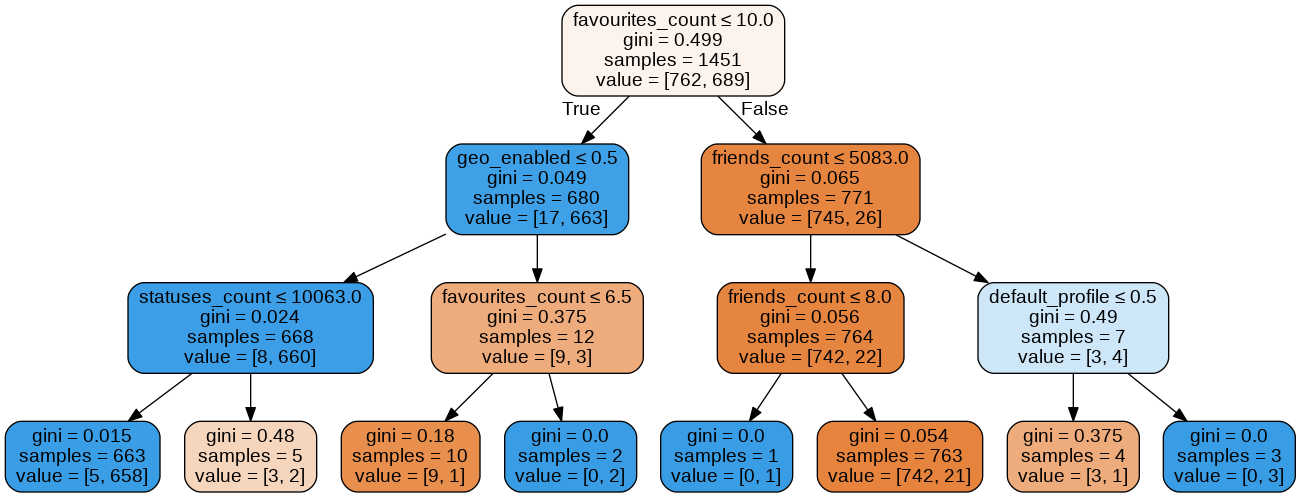

In [155]:
# Visualizar el árbol usando graphviz
dot_data = export_graphviz(treeclf, out_file=None,  
                feature_names=atributos,  
                filled=True, rounded=True,  
                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [156]:
# Calcular la importancia de los atributos
pd.DataFrame({'Atributo':atributos,
              'importancia':treeclf.feature_importances_}).sort_values('importancia',
                                                                      ascending=False).head()

,Atributo,importancia
2,favourites_count,0.963687
5,geo_enabled,0.019247
4,friends_count,0.008954
23,statuses_count,0.005222
0,default_profile,0.002891


In [157]:
# Calcular y mostrar la matriz de confusión
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, treeclf.predict(X_test))
predicted_cols = ['pred_'+c for c in le.classes_]
pd.DataFrame(conf, index = le.classes_, columns = predicted_cols)

,pred_Humans,pred_SocialSpambot1
Humans,314,7
SocialSpambot1,6,296
